In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from functions import query_db

In [2]:
db_path = './Data/movies.db'

In [3]:
movies_df = query_db("SELECT * FROM movies;", db_path)
movies_df

,id,title,release_date,original_language,adult,video,popularity,vote_average,vote_count
0,18,The Fifth Element,1997-05-02,en,0,0,67.153,7.500,10264
1,123,The Lord of the Rings,1978-11-15,en,0,0,31.564,6.570,819
2,141,Donnie Darko,2001-01-19,en,0,0,46.026,7.781,11832
3,194,Amélie,2001-04-25,fr,0,0,37.725,7.908,11046
4,423,The Pianist,2002-09-17,en,0,0,41.709,8.383,8699
...,...,...,...,...,...,...,...,...,...
1988,1251776,my mom,2024-02-26,en,0,0,2.744,0.000,0
1989,1251777,MSG: Mysterious Savory Grains,2024-02-26,en,0,0,2.744,0.000,0
1990,1251780,Matsutake,2024-02-26,en,0,0,2.744,0.000,0
1991,1251782,Homestead,2024-02-26,en,0,0,2.744,0.000,0


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 1993 non-null   int64         
 1   title              1993 non-null   object        
 2   release_date       1992 non-null   datetime64[ns]
 3   original_language  1993 non-null   object        
 4   adult              1993 non-null   int64         
 5   video              1993 non-null   int64         
 6   popularity         1993 non-null   float64       
 7   vote_average       1993 non-null   float64       
 8   vote_count         1993 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 140.3+ KB


In [5]:
query_db("PRAGMA table_info(movies)", db_path)

,cid,name,type,notnull,dflt_value,pk
0,0,id,INTEGER,1,None,1
1,1,title,TEXT,1,None,0
2,2,release_date,DATE,0,None,0
3,3,original_language,CHAR(2),0,None,0
4,4,adult,INTEGER,0,None,0
5,5,video,INTEGER,0,None,0
6,6,popularity,FLOAT,0,None,0
7,7,vote_average,FLOAT,0,None,0
8,8,vote_count,INTEGER,0,None,0


## Top movies by popularity

In [7]:
query = """
    SELECT title, popularity
    FROM movies
    ORDER BY popularity DESC
    LIMIT 10;
"""
popular_movies = query_db(query, db_path)
popular_movies

,title,popularity
0,No Way Up,2105.449
1,Poor Things,1357.698
2,Dune: Part Two,1312.486
3,Land of Bad,1301.124
4,Anyone But You,990.409
5,Dune,971.148
6,Migration,912.710
7,Through My Window 3: Looking at You,737.495
8,Wonka,689.639
9,Lights Out,593.922


<Axes: xlabel='popularity', ylabel='title'>

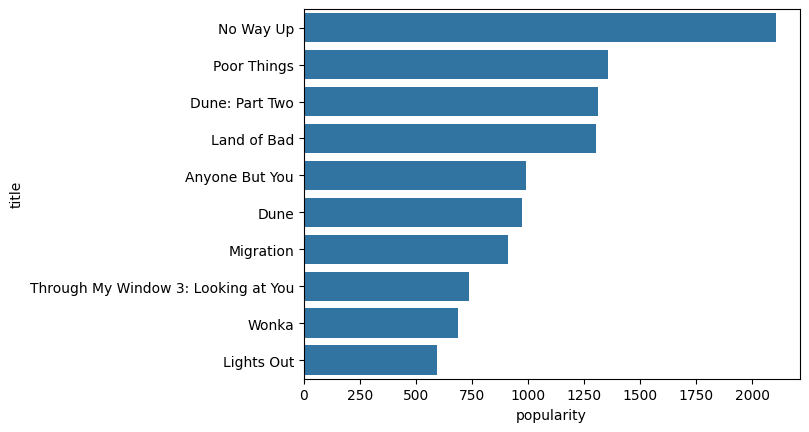

In [13]:
sns.barplot(x='popularity', y='title', data=popular_movies)

## Top languages by popularity

In [18]:
query = """
    SELECT original_language, AVG(popularity) AS avg_popularity
    FROM movies
    GROUP BY original_language
    ORDER BY avg_popularity DESC
    LIMIT 10;
"""
popular_languages = query_db(query, db_path)
popular_languages

,original_language,avg_popularity
0,en,30.833895
1,ko,24.671588
2,hy,22.492000
3,fi,22.214000
4,uk,20.677625
5,ca,19.911500
6,ga,19.174000
7,ja,19.119229
8,no,18.305154
9,es,18.180990


<Axes: xlabel='avg_popularity', ylabel='original_language'>

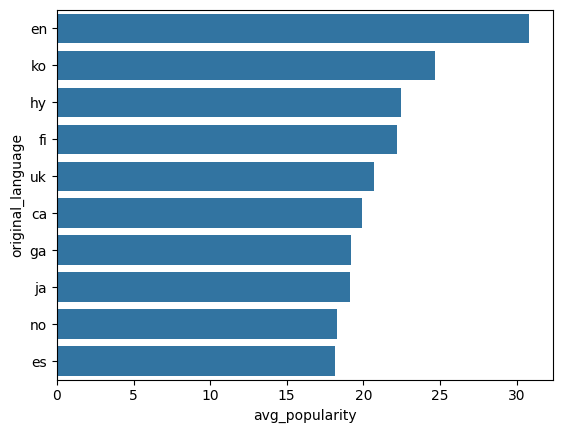

In [19]:
sns.barplot(x='avg_popularity', y='original_language', data=popular_languages)